In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 150
pd.options.display.max_columns = 150


In [268]:
df_olist_customers_dataset = pd.read_csv("data/olist_customers_dataset.csv")
df_olist_order_items_dataset = pd.read_csv("data/olist_order_items_dataset.csv")
df_olist_order_payments_dataset = pd.read_csv("data/olist_order_payments_dataset.csv")
df_olist_order_reviews_dataset = pd.read_csv("data/olist_order_reviews_dataset.csv")
df_olist_orders_dataset = pd.read_csv("data/olist_orders_dataset.csv")
df_olist_products_dataset = pd.read_csv("data/olist_products_dataset.csv")
df_olist_sellers_dataset = pd.read_csv("data/olist_sellers_dataset.csv")
df_product_category_name_translation = pd.read_csv("data/product_category_name_translation.csv")

#df_olist_geolocation_dataset = pd.read_csv("data/olist_geolocation_dataset.csv")

In [269]:
from functions import *
df_olist_order_reviews_dataset['length_comment_title'] = df_olist_order_reviews_dataset["review_comment_title"].apply(lambda x:length_str(x))
df_olist_order_reviews_dataset['length_comment_message'] = df_olist_order_reviews_dataset["review_comment_message"].apply(lambda x:length_str(x))
df_olist_order_reviews_dataset.drop(["review_comment_title","review_comment_message"],axis=1,inplace=True)

In [270]:
df_olist_products_dataset["product_photos_qty"].fillna(0,inplace=True)
df_olist_products_dataset["product_photos_qty"] = df_olist_products_dataset["product_photos_qty"].astype('int8')
df_olist_products_dataset["product_category_name"].fillna("unknown",inplace=True)
df_olist_products_dataset["product_description_lenght"].fillna(0,inplace=True)
df_olist_products_dataset.drop("product_name_lenght",axis=1,inplace=True)

In [271]:
df_product = df_olist_products_dataset.merge(df_product_category_name_translation,how="outer",on="product_category_name")
df_product["product_category_name_english"].fillna("unknown",inplace=True)
df_product.drop("product_category_name",axis=1,inplace=True)

In [272]:
df_olist_order_items_dataset = df_olist_order_items_dataset.groupby(["order_id","product_id","seller_id"]).agg({"order_item_id":"count","price":"sum","freight_value":"sum"})
df_olist_order_items_dataset.columns=['nb_items', 'sum_price', 'sum_freight_value']
df_olist_order_items_dataset.reset_index(inplace=True)

In [273]:
df_olist_order_payments_dataset[df_olist_order_payments_dataset["order_id"].duplicated()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1456,683bf306149bb869980b68d48a1bd6ab,1,credit_card,1,8.58
2324,e6a66a8350bb88497954d37688ab123e,2,voucher,1,10.51
2393,8e5148bee82a7e42c5f9ba76161dc51a,1,credit_card,1,0.67
2414,816ccd9d21435796e8ffa9802b2a782f,1,credit_card,1,5.65
2497,2cbcb371aee438c59b722a21d83597e0,2,voucher,1,7.80
...,...,...,...,...,...
103778,fd86c80924b4be8fb7f58c4ecc680dae,1,credit_card,1,76.10
103817,6d4616de4341417e17978fe57aec1c46,1,credit_card,1,19.18
103860,31bc09fdbd701a7a4f9b55b5955b8687,6,voucher,1,77.99
103869,c9b01bef18eb84888f0fd071b8413b38,1,credit_card,6,238.16


In [274]:
df_olist_order_payments_dataset["payment_type"].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [275]:
df_olist_order_payments_dataset = df_olist_order_payments_dataset.groupby(["order_id",]).agg({"payment_type":lambda x:",".join(set(x)),"payment_sequential":"count","payment_installments":"sum","payment_value":"sum"})
df_olist_order_payments_dataset.reset_index(inplace=True)

In [276]:
df_olist_order_payments_dataset["payment_type"]= df_olist_order_payments_dataset["payment_type"].apply(lambda x:'credit_card,voucher' if x == "voucher,credit_card" else x)

In [277]:
df_merge = df_olist_orders_dataset.merge(df_olist_order_reviews_dataset,how="outer",on="order_id")

In [278]:
df_merge = df_merge.merge(df_olist_order_payments_dataset,how="outer",on="order_id")

In [279]:
df_merge = df_merge.merge(df_olist_order_items_dataset,how="outer",on="order_id")

In [280]:
df_merge = df_merge.merge(df_olist_customers_dataset,how="outer",on="customer_id")

In [281]:
df_merge = df_merge.merge(df_product,how="outer",on="product_id")

In [282]:
df_merge = df_merge.merge(df_olist_sellers_dataset,how="outer",on="seller_id")

<AxesSubplot: >

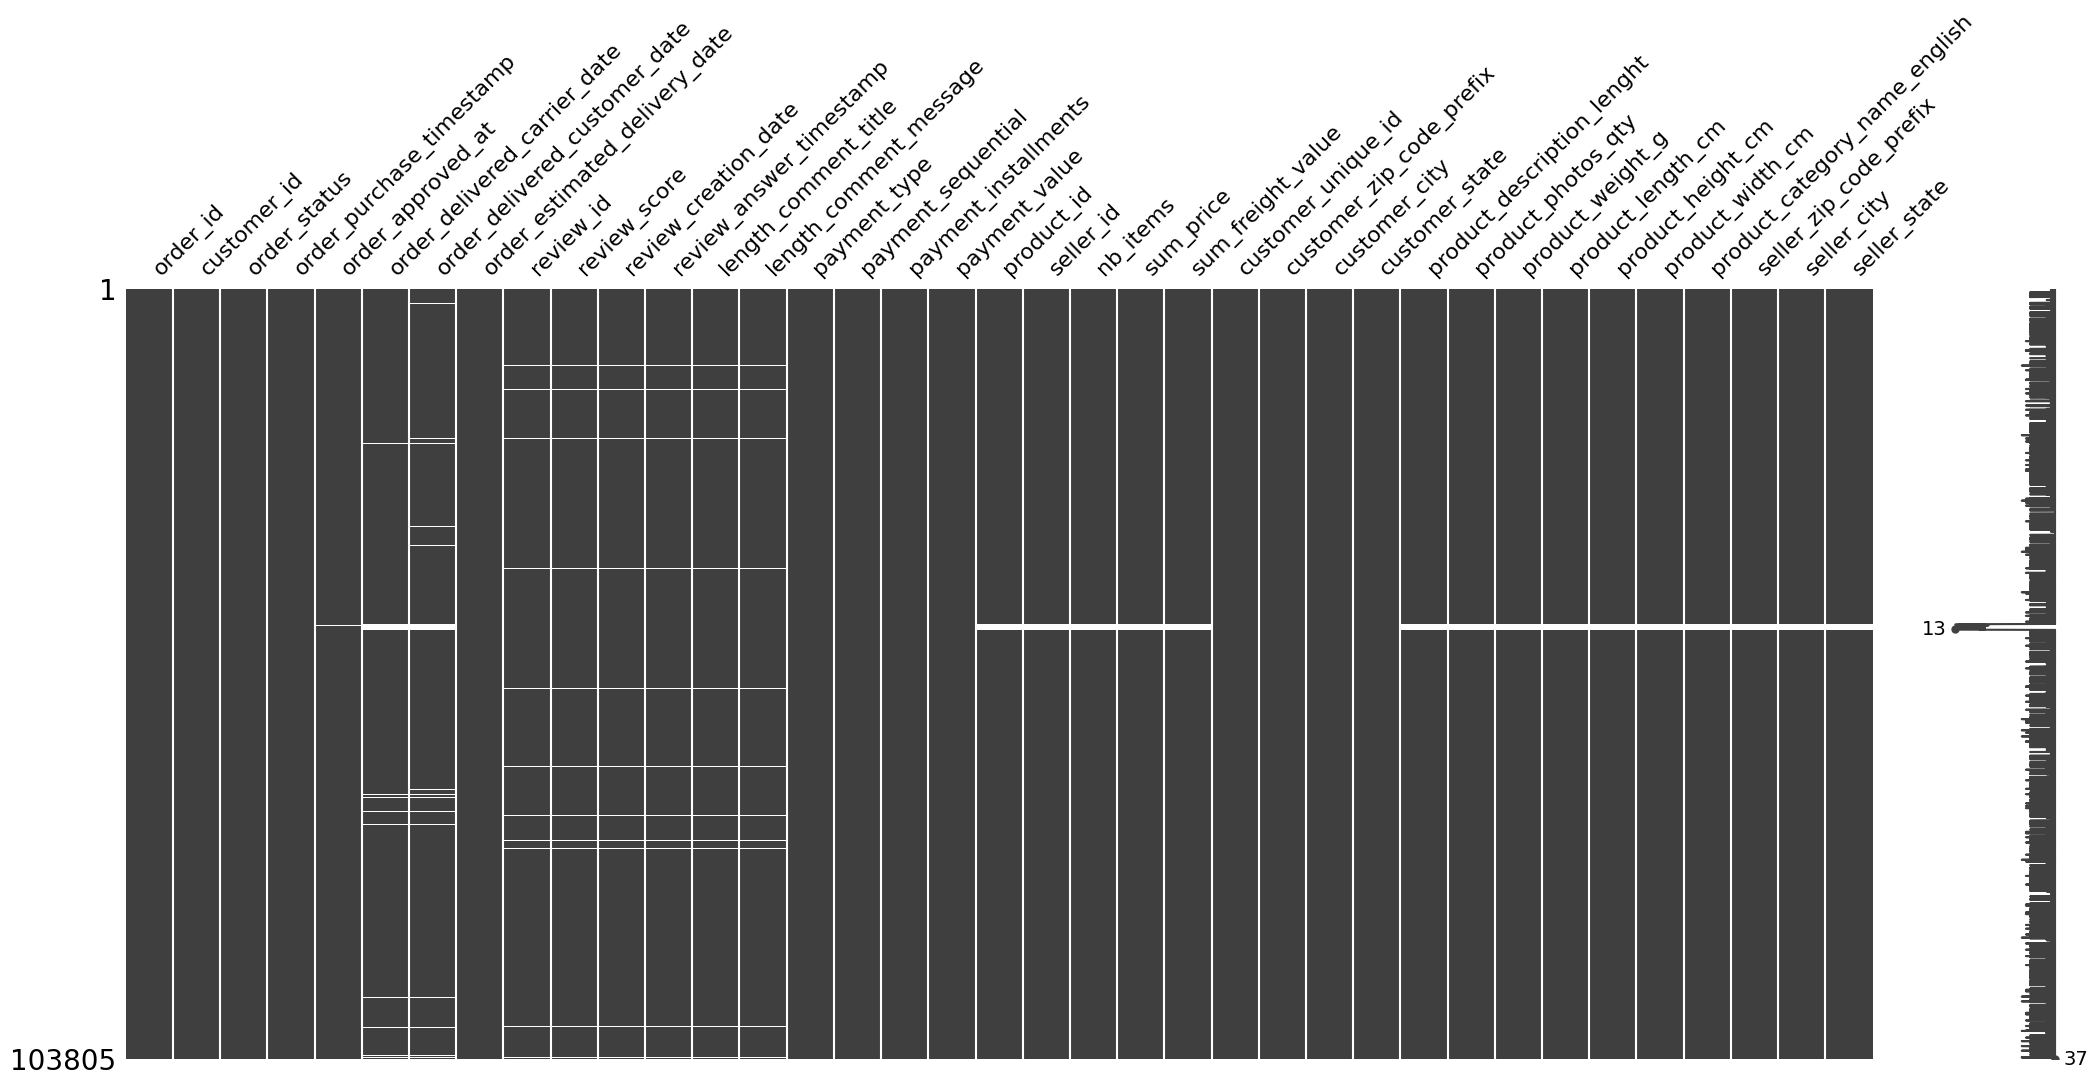

In [283]:
import missingno as msno

msno.matrix(df_merge)

In [284]:
df_merge["product_category_name_english"].unique()

array(['housewares', 'baby', 'cool_stuff', 'sports_leisure', 'toys',
       'furniture_decor', 'perfumery', 'health_beauty', 'music',
       'pet_shop', 'computers', 'construction_tools_construction',
       'signaling_and_security', 'auto', 'watches_gifts', 'audio',
       'electronics', 'computers_accessories', 'telephony',
       'consoles_games', 'stationery', 'party_supplies', 'unknown',
       'fashion_male_clothing', 'fashio_female_clothing', 'food',
       'costruction_tools_tools', 'fashion_bags_accessories',
       'garden_tools', 'office_furniture', 'furniture_living_room',
       'market_place', 'bed_bath_table', 'home_confort', 'art',
       'home_construction', 'air_conditioning',
       'agro_industry_and_commerce', 'fixed_telephony',
       'musical_instruments', 'luggage_accessories', 'fashion_sport',
       'fashion_shoes', 'home_appliances',
       'small_appliances_home_oven_and_coffee', 'small_appliances',
       'construction_tools_lights',
       'kitchen_dining_

In [285]:
df_merge[df_merge["order_id"]=="895ab968e7bb0d5659d16cd74cd1650c"]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,review_answer_timestamp,length_comment_title,length_comment_message,payment_type,payment_sequential,payment_installments,payment_value,product_id,seller_id,nb_items,sum_price,sum_freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
30987,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,eef5dbca8d37dfce6db7d7b16dd0525e,5.0,2017-08-15 00:00:00,2017-08-17 22:17:55,0.0,0.0,voucher,21.0,21.0,161.32,ebf9bc6cd600eadd681384e3116fda85,822166ed1e47908f7cfb49946d03c726,2.0,25.98,46.42,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,86.0,2.0,1300.0,50.0,9.0,41.0,bed_bath_table,25803.0,tres rios,RJ
93427,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,eef5dbca8d37dfce6db7d7b16dd0525e,5.0,2017-08-15 00:00:00,2017-08-17 22:17:55,0.0,0.0,voucher,21.0,21.0,161.32,5ddab10d5e0a23acb99acf56b62b3276,3d0cd21d41671c46f82cd11176bf7277,1.0,83.80,5.12,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,548.0,8.0,450.0,30.0,20.0,11.0,housewares,89217.0,joinville,SC


In [286]:
cat=['housewares', 'baby', 'cool_stuff', 'sports_leisure', 'toys',
       'furniture_decor', 'perfumery', 'health_beauty', 'music',
       'pet_shop', 'computers', 'construction_tools_construction',
       'signaling_and_security', 'auto', 'watches_gifts', 'audio',
       'electronics', 'computers_accessories', 'telephony',
       'consoles_games', 'stationery', 'party_supplies', 'unknown',
       'fashion_male_clothing', 'fashio_female_clothing', 'food',
       'costruction_tools_tools', 'fashion_bags_accessories',
       'garden_tools', 'office_furniture', 'furniture_living_room',
       'market_place', 'bed_bath_table', 'home_confort', 'art',
       'home_construction', 'air_conditioning',
       'agro_industry_and_commerce', 'fixed_telephony',
       'musical_instruments', 'luggage_accessories', 'fashion_sport',
       'fashion_shoes', 'home_appliances',
       'small_appliances_home_oven_and_coffee', 'small_appliances',
       'construction_tools_lights',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'drinks', 'food_drink',
       'books_general_interest', 'home_appliances_2',
       'construction_tools_safety', 'christmas_supplies',
       'furniture_mattress_and_upholstery', 'home_comfort_2',
       'costruction_tools_garden', 'fashion_underwear_beach',
       'arts_and_craftmanship', 'fashion_childrens_clothes',
       'books_technical', 'dvds_blu_ray', 'flowers', 'cds_dvds_musicals',
       'security_and_services', 'tablets_printing_image',
       'furniture_bedroom', 'cine_photo', 'diapers_and_hygiene',
       'books_imported', 'la_cuisine']

maison=['housewares','home_appliances', 'la_cuisine', 'home_confort','home_comfort_2','home_appliances_2', 'office_furniture','home_construction', 'air_conditioning']
outil = ['construction_tools_construction','construction_tools_lights','costruction_tools_tools','construction_tools_safety']
jardinnage=['flowers','costruction_tools_garden', 'garden_tools',]
mobilier_electromenager=['furniture_living_room','small_appliances_home_oven_and_coffee', 'small_appliances','furniture_mattress_and_upholstery', 'kitchen_dining_laundry_garden_furniture','furniture_bedroom','bed_bath_table','furniture_decor']
enfant=['diapers_and_hygiene','baby','toys']
fashion=['fashion_sport', 'fashion_childrens_clothes','fashion_underwear_beach','fashion_shoes','fashion_male_clothing', 'fashio_female_clothing','fashion_bags_accessories',]
sport=['sports_leisure']
auto=['auto','signaling_and_security']
service=['industry_commerce_and_business','agro_industry_and_commerce','security_and_services','market_place']
fete = ['party_supplies','christmas_supplies',]
papeterie=["stationery"]
beaute=['perfumery','health_beauty']
music=['music','musical_instruments','cds_dvds_musicals']
animaux=['pet_shop']
voyage=['luggage_accessories']
informatique=[ 'computers','watches_gifts','audio','fixed_telephony','tablets_printing_image','electronics', 'computers_accessories', 'telephony',]
loisir=['consoles_games','dvds_blu_ray']
alimentation=['food', 'drinks', 'food_drink',]
livre=['books_technical','books_general_interest','books_imported']
inconue=["unknown"]
autre=['cool_stuff']
art=['art','arts_and_craftmanship','cine_photo']

In [287]:
df_merge.drop(
    ['order_id', 
       'review_id', 'payment_sequential', 'product_id',
       'seller_id', 
       'customer_unique_id', 'customer_zip_code_prefix', 
       'seller_zip_code_prefix']
    ,axis=1,inplace=True
       )

<AxesSubplot: >

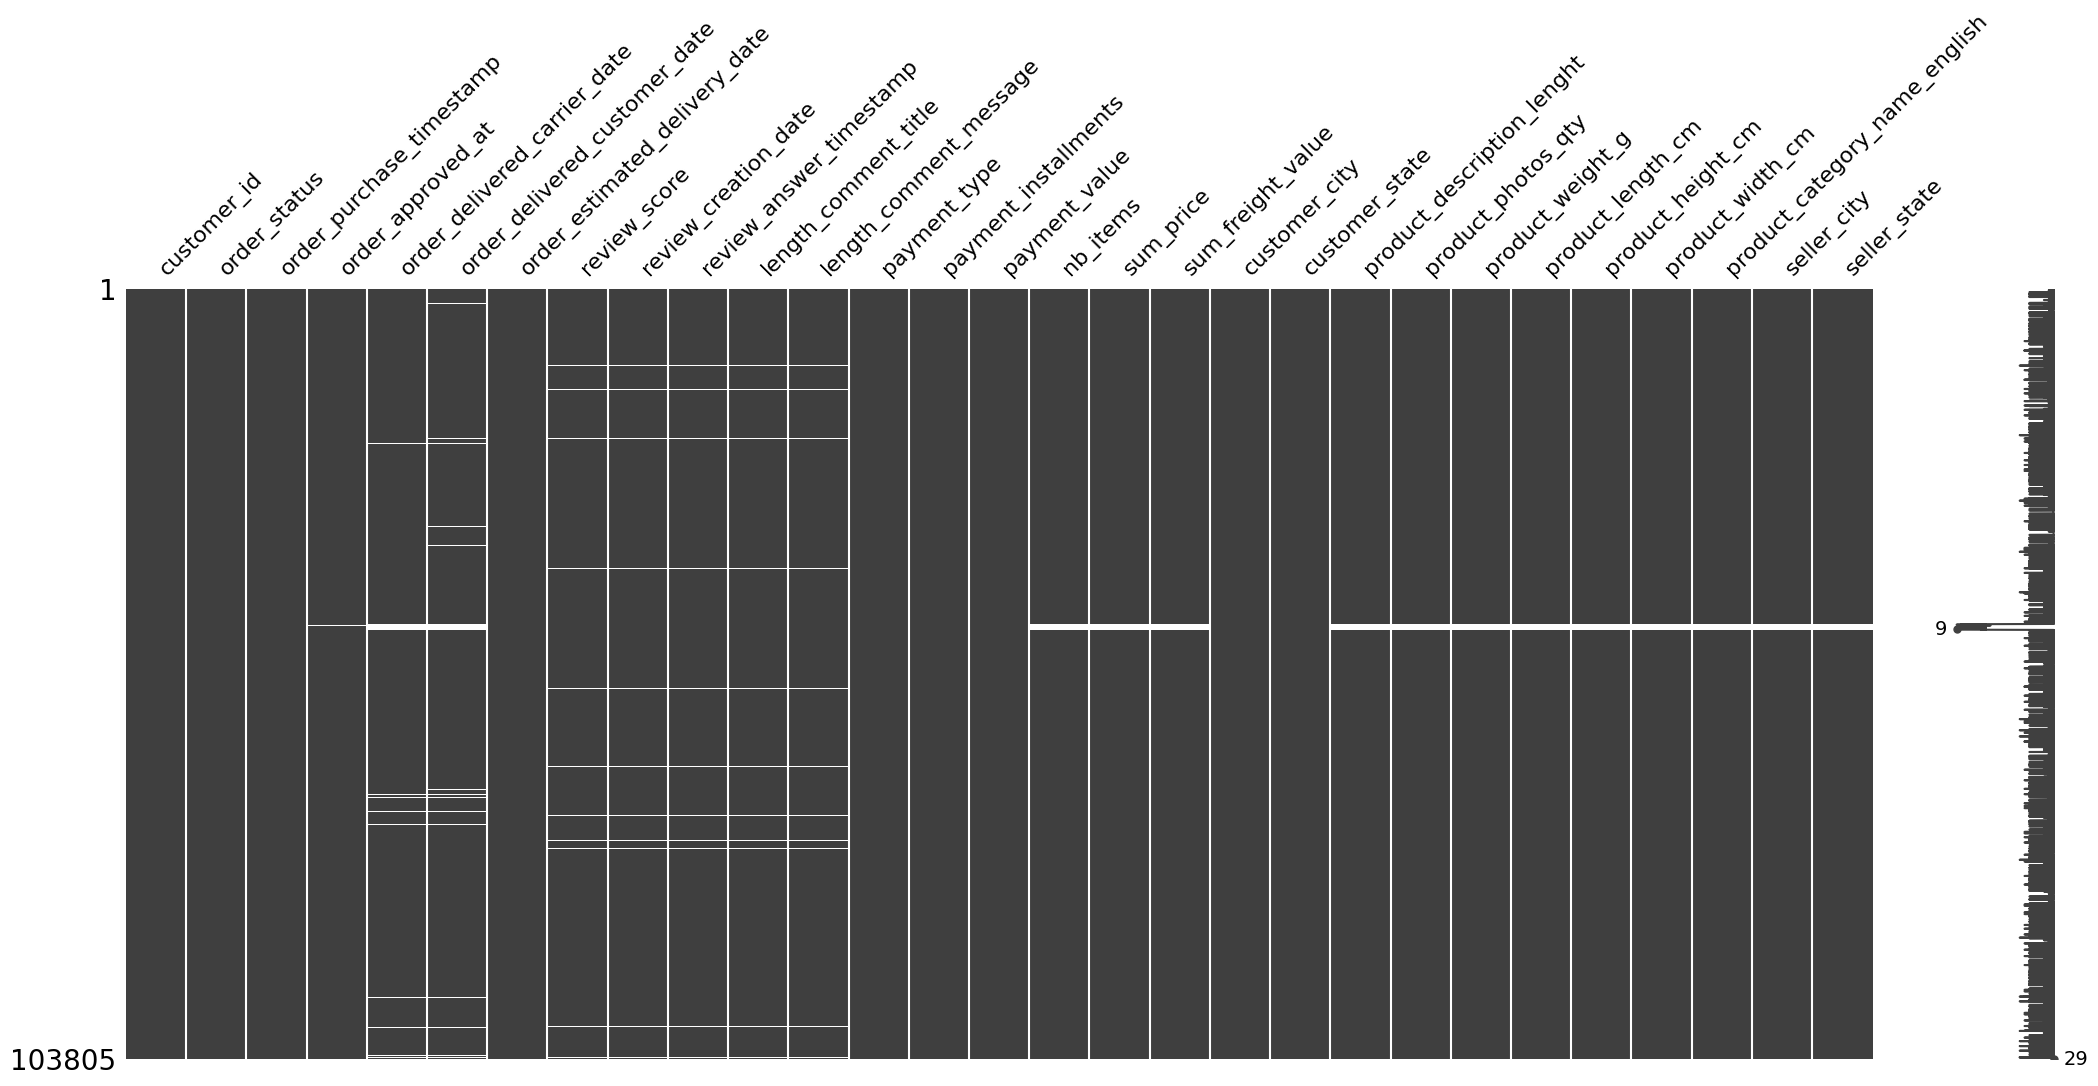

In [288]:
msno.matrix(df_merge)

In [289]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103805 entries, 0 to 103804
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    103805 non-null  object 
 1   order_status                   103805 non-null  object 
 2   order_purchase_timestamp       103805 non-null  object 
 3   order_approved_at              103644 non-null  object 
 4   order_delivered_carrier_date   101991 non-null  object 
 5   order_delivered_customer_date  100776 non-null  object 
 6   order_estimated_delivery_date  103805 non-null  object 
 7   review_score                   102989 non-null  float64
 8   review_creation_date           102989 non-null  object 
 9   review_answer_timestamp        102989 non-null  object 
 10  length_comment_title           102989 non-null  float64
 11  length_comment_message         102989 non-null  float64
 12  payment_type                  

In [290]:
df_merge.dropna(inplace=True)

In [291]:
# from pandas_profiling import ProfileReport

# profile = ProfileReport(df_merge, title="Pandas Profiling Report")
# profile.to_file(output_file='rapport.html')

In [292]:
df_merge.to_csv("data/data_merge.csv",index=False)